# Google Trends Regression Exercise

This next exercise will utilize the Google Trends program to display how linear regression works in a Python environment. For this practice exercise, search trends with a similar interest over time trend to "Gonzaga University" will be found to compare with this search phrase. Possible correlations to this trend line could include:

* Jalen Suggs
* Mark Few
* Jesuit institutions
* UCLA Basketball

## Load the Data

After deliberation, the phrase "UCLA Basketball" will be used to compare to "Gonzaga University". In order to analyze these regression trends, the data first needs to be uploaded to a `Pandas` dataframe. The code below carries out this task:

In [15]:
import pandas as pd

trends_df = pd.read_csv("google_trends.csv", index_col="Week")
print(trends_df.head(5))

           Gonzaga University: (United States)  \
Week                                             
2017-04-30                                   1   
2017-05-07                                   1   
2017-05-14                                   1   
2017-05-21                                   1   
2017-05-28                                   1   

           UCLA Basketball: (United States)  
Week                                         
2017-04-30                                2  
2017-05-07                                2  
2017-05-14                                2  
2017-05-21                                2  
2017-05-28                                2  


## Clean the Data

Before the regression chart can be plotted, the data needs to be checked for any missing values for cleaning. Additionally, in order for the data to be plotted correctly on the scatter plot, values in the two series need to be converted to numeric values. The code below prepares and cleans the data for regression:

In [16]:
gonzaga_ser = trends_df["Gonzaga University: (United States)"]
ucla_ser = trends_df["UCLA Basketball: (United States)"]

gonzaga_ser.replace(['<1'], ['0'], inplace=True)
ucla_ser.replace(['<1'], ['0'], inplace=True)

gonzaga_ser = pd.to_numeric(gonzaga_ser)
ucla_ser = pd.to_numeric(ucla_ser)

for i in range(len(trends_df.columns)):
    print("Null value column", i, "count:", trends_df.iloc[i].isnull().sum())

Null value column 0 count: 0
Null value column 1 count: 0


## Data Visualization

Now that the data is completely prepared and cleaned, linear regression can now be depicted using a scatter plot. For this plot, the `matplotlib` library will be used. For the x values, the search popularity of "UCLA Basketball" will be used. For the y values, the search popularity of "Gonzaga University" will be used. Lastly, a line will be added to depict the linear regression.

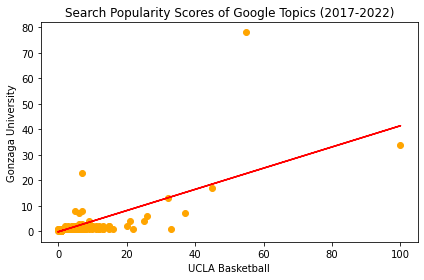

Resulting Linear Equation: y = 0.4159x + -0.185
Correlation Coefficient: 0.6686239897816004


In [17]:
import matplotlib.pyplot as plt

from scipy import stats

m, b, r, r_pval, std_err = stats.linregress(ucla_ser, gonzaga_ser)

plt.figure()
plt.scatter(ucla_ser, gonzaga_ser, color="orange")
plt.plot(ucla_ser, m*ucla_ser + b, color="red")
plt.title("Search Popularity Scores of Google Topics (2017-2022)")
plt.xlabel("UCLA Basketball")
plt.ylabel("Gonzaga University")
plt.tight_layout()
plt.show()

print("Resulting Linear Equation: y = ", round(m, 4), "x", " + ", round(b, 4), sep="")
print("Correlation Coefficient:", r)

The two topics have surprisingly correlated relations, despite the seemingly no relation to them. A further look into the history over the past couple years would reveal the slowly developing rivalry between these two top-tier college basketball schools. Their trends were nearly identical, often having a spike during the NCAA Men's Basketball Tournament.

Given the correlation coefficient, there is about a 67% linear relationship between the two topics.